# 线性神经网络

### 我们将介绍神经网络的整个训练过程，包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型
### 我们将从经典算法————线性神经网络开始，介绍神经网络的基础知识

## 3.1 线性回归

#### 回归是为单个或多个因变量和自变量之间关系建模的一类方法
#### 在一些科学领域，回归经常用来表示输入和输出之间的关系

#### 在机器学习领域中的大多数任务通常都与预测（prediction）有关
#### 但不是所有预测都是回归问题

### 3.1.1 线性回归的基本元素

#### 线性回归（linear regression）可以追溯到19世纪初，它在回归的各种标准工具中最简单而且最流行

#### 线性回归基于几个基本的假设：
#### 1. 首先，假设自变量$\chi$和因变量$y$的关系是线性的，即$y$可以表示为$\chi$中元素的加权和
#### 2. 这里通常允许包含观测值的一些噪声，其次，我们假设任何噪声都比较正常，如噪声遵循正态分布

#### 为开发一个能预测__的模型，我们需要数据集，在ml中称为训练数据集（training dataset）
#### 每行数据称为样本（sample），也可以称为数据点（data point）或数据样本（data instance）
#### 预测的目标叫做标签（label）或者目标（target）。
#### 预测所依据的自变量叫做特征（feature）或者协变量（covariate）

#### 通常n表示数据集中的样本数。对索引为i的样本其输入表示为$x^{(i)} = [x_1^{(i)}, x_2^{(i)}]^⊤$

### 线性模型

#### 每个解决方案的核心都是一个模型，该模型描述如何将特征转换为目标的估计
#### 线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和

#### $$ \textrm{price} = w_{\textrm{area}} \cdot \textrm{area} + w_{\textrm{age}} \cdot \textrm{age} + b.\textrm{price} = w_{\textrm{area}} \cdot \textrm{area} + w_{\textrm{age}} \cdot \textrm{age} + b. $$

#### $w_{area}$ 和 $w_{age}$称为权重（weight），权重决定了每个特征对我们预测值的影响
#### $b$称为偏置（bias）、偏移量（offset）或截距（intercept）
#### 偏置是指当所有特征都取值为0时，预测值应该为多少
#### 如果没有偏置项，我们模型的表达能力会出问题

#### 严格来说，这个公式是输入特征的一个仿射变换（affine transformation）
#### 仿射变换的特点是通过加权和对特征进行线性变换（linear transformation），并通过偏置项进行平移（translation）

#### 我们的目标是找到权重$w$和偏置$b$

#### 在机器学习中，我们的数据集通常都是高维的，建模时采用线性代数表示法更方便
#### 当我们输入包含$d$个特征时，我们将预测结果$\hat y$表示为
#### $$ \hat{y} = w_1  x_1 + \cdots + w_d  x_d + b. $$

#### 将所有特征收集到$\chi \in \mathbb R^d$中，可以通过点积来表示公式
#### $$ \hat{y} = \mathbf{w}^\top \mathbf{x} + b. $$

#### 向量$\chi$对应于单个数据样本的特征
#### 用符号表示的矩阵$X \in R^{n×d}$ 可以很方便地引用我们整个数据集的n个样本
#### 其中，X的每一行是一个样本，每一列是一种特征。

#### 对于特征集合X，预测值$\hat y \in R^n $可以通过矩阵‐向量乘法表示为：

#### $$ {\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b, $$

#### 这个过程中的求和将使用广播机制
#### 线性回归的目标是找到一组权重向量w和偏置b能够使得新样本预测标签的误差尽可能小

#### 无论如何，都可能会出现少量的观测误差。因此，即使确信特征与标签的潜在关系是线性的，我们也会加入一个噪声项来考虑观测误差带来的影响

#### 在开始寻找最好的模型参数（model parameters）w和b之前，我们还需要两个东西：（1）一种模型质量的度量方式；（2）一种能够更新模型以提高模型预测质量的方法。

#### 损失函数和平方误差
#### 在线性回归中，损失函数用于量化模型预测值与实际标签之间的差距。通常选择非负数作为损失，数值越小表示拟合效果越好，完美预测的损失为0。回归问题中常用的损失函数是平方误差函数，定义为：
#### $$ l^{(i)}(w, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 $$

#### 平方误差函数的特点
#### 平方误差函数中的常数 $\frac{1}{2} $是为了求导时的方便。平方误差函数使得预测值与实际值之间较大的差异导致更大的损失，这有助于模型更好地拟合数据。 
<img src = "https://zh.d2l.ai/_images/fit-linreg.svg" margin: auto>

#### 模型在整个数据集上的质量度量
#### 为了度量模型在整个数据集上的质量，计算所有训练样本上的损失均值：
#### $$ L(w, b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(w, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2 $$

#### 模型训练的目标
#### 训练模型的目标是找到一组参数 $ w^*, b^* $，使得它们能最小化所有训练样本上的总损失：
#### $$ w^*, b^* = \arg \min_{w,b} L(w, b) $$


### 解析解

#### 线性回归不同于其他模型，其解可以用一个公式简单的表示出来，这类解叫作解析解
#### 首先，将b合并到**w**中，方式是在包含所有参数的矩阵加一列
#### 那我们的预测问题就是最小化$||y-\chi w||$,在这损失平面只有一个临界点，这个点对应整个区域的损失极小值
#### 将损失关于**w**的导数设为0，得到解：
#### $$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

#### 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里

### 3.1.1.4. 随机梯度下降

#### 我们用到一种名为梯度下降（gradient descent）的方法，这种方法几乎可以优化所有深度学习模型
#### 它通过不断地在损失函数递减的方向上更新参数来降低误差

#### 梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）
#### 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集
#### so，我们经常会在每次计算更新时随机抽取一小部分的样本，这种变体叫做随机梯度下降（minibatch stochastic gradient descent）

#### 在每次迭代中，我们首先随机抽样一个小批量$B$。它是由固定数量的训练样本组成的
#### 然后我们计算梯度，最后，我们将梯度乘以一个预先确定的正数η，并从当前参数值中减去
#### $$ (\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b). $$

#### 总结一下，算法的步骤如下： （1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式:

#### $$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}$$

#### $w$和**x**都是向量。在这里，更优雅的向量表示法比系数表示法（如w1, w2, . . . , wd）更具可读性
#### $|B|$表示每个小批量中的样本数，这也称为批量大小（batch size）η表示学习率（learning rate）。
#### 批量大小和学习率的值通常是手动预先指定
#### η表示学习率（learning rate）
#### 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。调参（hyperparameter tuning）是选择超参数的过程

#### 在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），我们记录下模型参数的估计值，表示为$\hat w$ ,$\hat b$。

#### 我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值

#### 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。
#### 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，这一挑战被称为泛化（generalization）

### 用模型进行预测

#### 给定“已学习”的线性回归模型$\hat w^⊤x + \hat b$，现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格
#### 给定特征估计目标的过程通常称为预测（prediction）或推断（inference）。 # 推理更好听，其实就是推断

### 3.1.2 矢量化加速

#### 训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。
#### 为实现，需要我们对计算进行矢量化，从而用线性代数库

In [2]:
from fc import torch as fc

In [3]:
%matplotlib inline
import math
import time
import numpy as np
import torch

#### 为说明矢量化为何如此重要，我们考虑对向量相加的两种方法
#### 实例化两个10000维的向量，第一种用for循环便利，第二种直接+

In [4]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

#### 我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [5]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

#### 我们可以对工作负载进行基准测试
#### 首先，我们使用for循环，每次执行一位的加法

In [6]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.05663 sec'

#### 或者，我们使用重载的+运算符来计算按元素的和 🌟

In [7]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

### 3.1.3. 正态分布与平方损失

#### 我们通过对噪声分布的假设来解读平方损失目标函数(mse)
#### 正态分布和线性回归之间的关系很密切
#### 正态分布（normal distribution），也称为高斯分布（Gaussian distribution）
#### 高斯（Gauss）应用于天文学研究
#### 若随机变量$x$具有均值$\mu$和方差$\sigma^2$(标准差$\sigma $)

#### $$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right). $$

#### 定义一个Python函数来计算正态分布

In [8]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2) * np.exp (-0.5 / sigma**2 * (x - mu)**2)
    return p

#### 可视化正态分布

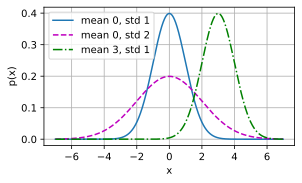

In [9]:
x = np.arange(-7, 7, 0.01)

params = [(0, 1), (0, 2), (3, 1)]
fc.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5, 2.5), legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

#### 改变均值会产生沿轴的偏移，增加方差将会分散分布、降低其峰值
#### 均方损失可以用于线性回归的一个原因是
#### 噪声正态分布：$$ y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$
#### 其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$

#### 因为$\epsilon$满足正态分布，所以可以移项后得
#### 给定的$\chi $观测到特定的$y$似然（likelihood）：
#### $$ P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

#### 根据极大似然估计法，参数$\omega$和$b$的最优值是使整个数据集的极大似然值
#### $$ P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

#### 虽然许多指数函数的乘积最大化看似很难，但其实在不改变目标的前提下，用极大似然对数去简化
#### 由于历史原因，优化被说成最小化而不是最大化
#### 我们可以改为最小化负对数似然$-\log P(\mathbf y \mid \mathbf X)$
#### $$ -\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

#### 我们只需假设$\sigma$是某个固定常数就可以忽略第一项，因为第一项不依赖$w$和$b$
#### 现在第二项除了$\frac{1}{\sigma^2}$之外，其余的和均方误差是一样的
#### 上式不依赖$\sigma$，最小化均方误差等价于对线性模型的极大似然估计

### 3.1.4. 从线性回归到深度网络

#### 尽管我们只讨论了线性模型，但我们依然可以用神经网络的方式来描述它
#### 第一步就是用“层”符号来重写这个模型

### 3.1.4.1. 神经网络图

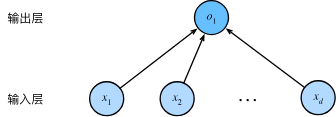

#### 如图，我们将线性回归模型描述为一个神经网络。
#### 该图只显示连接模式，即每个输出如何连接到输入，隐去了权重和偏置的值。
#### 输入为$x_1...x_d$，因此输入层中的输入数为d或称为特征维度（feature dimensionality）
#### 由于模型重点在计算上，所以我们计算层数时不考虑输入层，也就是说层数为1，是单层神经网络
#### 每个输入都与每个输出相连，我们将这种变换称为全连接层（fully‐connected layer）或称为稠密层（dense layer）

### 生物学

#### 线性回归发明的时间（1795年）早于计算神经科学，所以将线性回归描述为神经网络似乎不合适。但是线性回归说是神经网络也合理。
#### 控制学家们开始开发人工神经元模型时，以线性模型为一个起点
#### 如图，轴突（axon，输出线）和轴突端子（axon terminal，输出端子）通过突触（synapse）与其他神经元连接

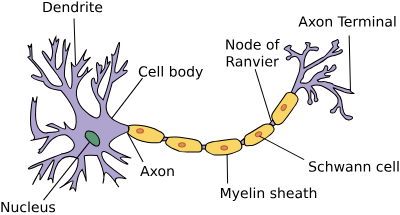

#### 树突中接收到来自其他神经元的信息$x_i$。该信息通过突触权重$w_i$来加权
#### 来自多个源的加权输入以加权和$ y = \sum_i x_i w_i + b $的形式聚集在细胞核中
#### 然后将这些信息发送到轴突$y$中处理

#### 当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感
#### 援引斯图尔特·罗素和彼得·诺维格在《Artificial Intelligence:A Modern Approach》中说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。 
#### 同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。

### 3.1.5. 小结

#### 机器学习模型中的关键要素是训练数据、损失算法、优化算法及模型本身
#### 矢量化简洁了表示，同时加快了速度
#### 最小化目标函数和极大似然估计等价
#### 线性回归模型也是一个神经网络模型哦😊
##### ps：如果损失函数是似然函数的对数函数，那么最小化目标函数和执行极大似然估计就等价

### 3.1.6 测试

#### test 1
##### 解析解是所有x的平均值
##### 满足正态分布时，结果还是平均值

#### test 2
##### 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置b（我们可以通过向X添加所有值为1的一列来做到这一点）。
1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
2. 计算损失对w的梯度。
3. 通过将梯度设为0、求解矩阵方程来找到解析解。
4. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

#### test 3
##### 3假定控制附加噪声ϵ的噪声模型是指数分布。也就是说，$p(ϵ) = \frac{1}{2} exp(−|\epsilon|)$
1. 写出模型$− log P(y | X)$下数据的负对数似然。
2. 请试着写出解析解。
3. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

## 3.2 线性回归的从零开始实现

#### 可以写代码来实现线性回归了，我们将从零开始，包括数据pipeline、模型、损失函数即mini-batch随机梯度下降器


In [10]:
import random
import torch

### 3.2.1 生成数据集

#### 简单起见，将根据带有噪声的线性模型构造一个人造数据集。
#### 我们的任务是使用这个有限样本的数据集来恢复这个模型的参数
#### 使用低维数据集，更容易可视化
#### 生成一个包含1000个样本的数据集，每个样本包含从标准正态分布中采样的2个特征 一个矩阵$X ∈ R ^{1000×2}$

#### 使用线性模型参数$ w = [2, −3.4]^⊤、b = 4.2 $和**噪声项**$\epsilon$生成数据集及其标签：
#### $y = Xw + b + ϵ.$


#### ϵ可以视为模型预测和标签时的潜在观测误差
#### 即ϵ服从均值为0的正态分布,我们将标准差设为0.01。

In [11]:
def synthetic_data(w, b, num_samples): #@save
    """生成y=Xw+b噪声"""
    X = torch.normal(0, 1, (num_samples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

#### features中每一行都包含一个二维数据样本，labels中每一行包含一个label

In [12]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.6917,  1.0771]) 
label: tensor([-0.8440])


#### 通过生成第二个特征features[:, 1]和labels散点图，可以看到直观的线性关系

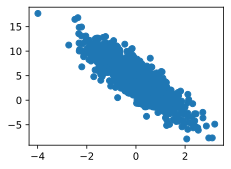

In [13]:
fc.set_figsize()
fc.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy())

### 3.2.2 读取数据集

#### 所以有必要定义一个函数，该函数能打乱数据集中的样本并以小批量方式获取数据

In [14]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 随机读取
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(batch_size+i, num_examples)])
        yield features[batch_indices], labels[batch_indices] # 保存结果

#### 通常，我们利用GPU并行运算的优势，处理合理大小的“小批量”
#### 每个样本和其损失函数的梯度都可以并行地进行模型计算

In [15]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7362,  0.3084],
        [ 0.4206, -0.7659],
        [-0.3225,  1.2880],
        [-1.8407, -0.9848],
        [ 0.9198, -1.5327],
        [ 0.4591,  1.4218],
        [-0.8007,  0.3363],
        [-0.0924, -0.1941],
        [ 0.7502,  0.8727],
        [-0.0435,  0.3201]]) 
 tensor([[ 1.6842],
        [ 7.6423],
        [-0.8279],
        [ 3.8634],
        [11.2523],
        [ 0.2911],
        [ 1.4515],
        [ 4.6798],
        [ 2.7346],
        [ 3.0283]])


#### 深度学习框架中实现的内置迭代器效率要高得多， 它可以处理存储在文件中的数据和数据流提供的数据

### 3.2.3. 初始化模型参数

#### 我们通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重， 并将偏置初始化为0

In [16]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#### 在初始化参数之后，我们的任务是更新这些参数，直到这些参数足够拟合我们的数据
#### 每次都计算损失函数关于模型的梯度，根据梯度，向减少损失的方向更新参数

### 3.2.4. 定义模型

#### 接下来，我们就要来定义模型，将模型的输入和输出关联上

In [17]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

### 3.2.5. 定义损失函数

#### 用到MSE（均方损失函数），真实值$y$要转换成与预测值$\hat y$形状相同

In [18]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 3.2.6. 定义优化算法

#### 线性回归有解析解，但其他模型却没有，接下来介绍小批量梯度下降
#### 每一步中，随机抽取一个小批量，根据参数计算损失函数梯度
#### 接下来，朝着减少损失的方向更新参数，下面用batch_size规定化步长

In [19]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 3.2.7. 训练

#### 概括一下，我们将执行以下循环：
##### 初始化参数
##### 重复以下训练，直到完成
#####   计算梯度$ \mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
#####   更新参数$ (\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

#### 在每个迭代周期（epoch）中，我们使用data_iter函数遍历整个数据集， 并将训练数据集中所有样本都使用一次

In [20]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.035137
epoch 2, loss 0.000133
epoch 3, loss 0.000052


In [21]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 5.9128e-05, -1.1706e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([9.9659e-05], grad_fn=<RsubBackward1>)


####  在机器学习中，我们通常不太关心恢复真正的参数，而更关心如何高度准确预测参数

### 3.2.8. 小结

#### 学习了深度网络是如何实现和优化的，这一过程中的张量和自动微分，无需定义层或复杂的优化器

### 3.2.9. 练习

##### 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？
##### 假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?
##### 能基于普朗克定律使用光谱能量密度来确定物体的温度吗？
##### 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？
##### 为什么在squared_loss函数中需要使用reshape函数？
##### 尝试使用不同的学习率，观察损失函数值下降的快慢。
##### 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？

## 3.3. 线性回归的简洁实现

#### 介绍如何通过使用深度学习框架来简洁地实现 3.2节中的线性回归模型

### 3.3.1. 生成数据集

In [22]:
import numpy
from torch.utils import data

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = fc.synthetic_data(true_w, true_b, 1000)

### 3.3.2 读取数据集

#### 调用utils的data的TensorDataset和dataloader来读取数据

In [23]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # 是否训练来决定是否洗牌

batch_size = 10
data_iter = load_array((features, labels), batch_size)

#### 这里我们使用iter构造Python迭代器，并使用next从迭代器中获取第一项

In [24]:
next(iter(data_iter))

[tensor([[-0.3387,  2.4519],
         [ 0.1634,  0.3304],
         [-0.2526,  0.2338],
         [-0.9723,  1.5299],
         [ 1.0836,  1.5051],
         [ 0.6167, -0.1173],
         [ 2.1901, -0.5781],
         [ 0.4235,  0.2857],
         [ 0.5490, -0.4662],
         [ 0.1079,  0.2777]]),
 tensor([[-4.8013],
         [ 3.3980],
         [ 2.9139],
         [-2.9504],
         [ 1.2423],
         [ 5.8324],
         [10.5357],
         [ 4.0880],
         [ 6.8616],
         [ 3.4682]])]

### 3.3.3. 定义模型

#### 用框架的预定义好的层，这样可以专注工作
#### 首先定义一个net，这是Sequential类的实例。 Sequential类将多个层串联起来
#### 给定输入之后，Sequential会从第一层输出传入第二层的输入，以此类推

#### 我们将两个参数传递到nn.Linear中。 第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1

In [25]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### 3.3.4. 初始化模型参数

#### 如在线性回归模型中的权重和偏置,深度学习框架通常有预定义的方法来初始化参数

In [26]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 3.3.5. 定义损失函数

#### 计算均方误差使用的是MSELoss类，也称为平方$L_2$范数。默认情况返回所有样本损失的平均值

In [27]:
loss = nn.MSELoss()

### 3.3.6 定义优化算法

#### 小批量随机梯度下降算法(mini-batch sgd)是一种优化神经网络的标准工具
#### pytorch在optim模块里实现了很多这个算法的变体
#### 在实例化sgd时，指定优化的参数（通过net.parameters()从我们的模型中获得）及优化算法所需的超参字典
#### but小批量随机梯度下降只需要设置lr值，这里设置为0.03

In [28]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

### 3.3.7 训练

#### 在一个迭代周期中，我们将完整遍历一次数据集，从中获取一个小批量的输入和相应的标签
#### 4 each batch，我们将：

##### 通过调用net(X)生成预测并计算损失l（前向传播）。 forward

##### 通过进行反向传播来计算梯度。backward

##### 通过调用优化器来更新模型参数。 update

In [29]:
num_epochs = 3
for epoch in  range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch{epoch + 1}, loss{l:f}')

epoch1, loss0.000232
epoch2, loss0.000105
epoch3, loss0.000104


#### 比较生成数据集的真实参数和通过有限数据训练获得的模型参数
#### 要访问参数，我们首先从net访问所需的层，然后读取该层的权重和偏置

In [30]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([3.5048e-05, 6.1202e-04])
b的估计误差： tensor([-0.0011])


### 3.3.8 小结

#### 可以用pytorch的高级API来实现模型
#### data模块提供了数据处理工具，nn定义了大量的神经网络层和损失函数
#### 可以通过_结尾将参数替换，从而初始化参数

### 3.3.9. 练习

#### 1. 如果将小批量的总损失替换为小批量损失的平均值，需要如何更改学习率？

#### 2. 查看深度学习框架文档，它们提供了哪些损失函数和初始化方法？用Huber损失代替原损失，即(3.3.1)
 $$\begin{split}l(y,y') = \begin{cases}|y-y'| -\frac{\sigma}{2} & \text{ if } |y-y'| > \sigma \\ \frac{1}{2 \sigma} (y-y')^2 & \text{ 其它情况}\end{cases}\end{split}$$
##### 其它情况
##### 如何访问线性回归的梯度？

## 3.4 softmax回归

#### 回归可以用于预测多少的问题
#### 事实上，我们也对分类问题感兴趣：不是问“多少”，而是问“哪一个”
#### 硬类别是属于哪一类，软类别是属于每个类的概率。即使我们只关心硬类别，我们仍然使用软类别的模型。

### 3.4.1. 分类问题

#### 从一个图像分类问题开始，假设每次输入是一个$2 X 2$的灰度图像
#### 我们可以用一个标量表示每个像素值，每个图像对应四个特征$x_1, x_2, x_3, x_4$
#### 假设每个图像属于类别“猫”“鸡”和“狗”中的一个

#### 可以选择用$y \in {1, 2, 3}$，整数代表{🐔， 🐱， 🐶}，是在计算机上的有效储存方法
#### 如果类别间有自然顺序，如预测年龄段（婴儿到老年），那么这个问题将转化为回归问题，且这样也有效

#### 但一般分类与自然顺序无关，统计学家很早就发明了一种表示数据分类的简单方法：独热编码（one-hot encoding）
#### 独热编码是一个向量，它的分量和类别一样多。 类别对应的分量设置为1，其他所有分量设置为0
##### $$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}. $$

### 3.4.2. 网络架构

#### 为了估计所有可能类别的条件概率，我们需要一个有**多个输出**的模型，每个类别对应一个输出
#### 解决线性模型的分类问题，我们需要和输出一样多的仿射函数（affine function）
#### 即每个输出对应其仿射函数
#### 如我们有4特征3可能的输出类别，我们就需要12个权重$\omega_i$，三个偏置标量
#### $$ \begin{split}\begin{aligned}o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.\end{aligned}\end{split} $$

#### 用神经网络图来描述这个过程
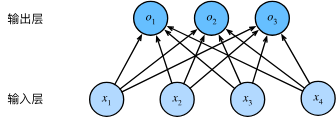
#### 和线性回归一样，softmax回归也是一层网络，因此输出也是全连接层

#### 为了简洁表达模型，依然采用线代符号，通过向量表示:$\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$

### 3.4.3. 全连接层的参数开销

#### 在深度学习中，全连接层无处不在，顾名思义，全连接层是“完全”连接的，可能有很多可学习的参数
#### 任何具有d个输入和q个输出的全连接层，参数开销为O(dq)
#### 将d个输入转换为q个输出的成本可以减少到$O(\frac{dq}{n})$， 其中超参数n可以由我们灵活指定，以在实际应用中平衡参数节约和模型有效性 (Zhang et al., 2021)

### 3.4.4. softmax运算

#### 现在将优化参数以最大化观测数据的概率，为了得到预测结果，我们设定一个阈值，如选择具有最大概率的标签
#### 希望模型的输出$\hat{y}_j$可以视为属于类j的概率，之后选择最大输出值的类别$\operatorname*{argmax}_j y_j$作为我们的预测
#### 例如，如果输出的结果是{0.1, 0.8, 0.1}，那就是取第二个类🐔


#### 未规范化的预测值是线性层的输出，它是通过权重矩阵和偏置向量与输入相乘后得到的。未规范化的预测值可以为任何实数，包括负数
#### 概率的基本公理规定，概率的总和必须为1，并且概率只能为非负数。未规范化的预测值违反了这些公理，因此不能直接视为概率
#### 我们需要一个训练的目标函数，来激励模型精准地估计概率
#### 校准是指将分类器的预测概率映射到真实的类别概率的过程。如果分类器的预测概率与真实的类别概率相匹配，那么该分类器就被认为是校准良好的

#### 社会科学家邓肯·卢斯于1959年在选择模型（choice model）的理论基础上 发明的softmax函数正是这样做的
#### softmax可以将为规范化的预测变换为非负数且总和为1
#### 所以是先求幂，确保输出非负，再除以它们的总和
#### $$ \hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)} $$

#### 对于所有的j总有$ 0 <= \hat y_j <= 1$ ，因此y可以视为一个正确的概率分布
#### softmax不会改变未规范化的预测o之间的大小次序，只会确定分配给每个类别的概率
#### 因此在预测过程中，我们仍然可以用下式来选择最可能的类别
#### $$ \operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.$$

#### 虽然softmax是非线性函数，但其输出仍由输入特征的仿射变换决定，因此是一个线性模型

### 3.4.5. 小批量样本的矢量化

#### 为提高计算效率，我们通常会对小批量样本的数据执行矢量计算
#### 我们读了样本X，特征维度为d，批量大小为n，我们有q个类别
#### 那么小批量样本的特征为$\mathbf{X} \in \mathbb{R}^{n \times d}$， 权重为$\mathbf{W} \in \mathbb{R}^{d \times q}$， 偏置为$\mathbf{b} \in \mathbb{R}^{1\times q}$
#### softmax回归的矢量计算表达式是:
#### $$ \begin{split}\begin{aligned} \mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}). \end{aligned}\end{split}$$


#### 相对于一次处理一个样本， 小批量样本的矢量化加快了$\mathbf{X}和\mathbf{W}$的矩阵-向量乘法
#### 那么softmax运算可以按行（rowwise）执行： 对于$\mathbf{O}$的每一行，我们先对所有项进行幂运算，然后通过求和对它们进行标准化
#### $\mathbf{X} \mathbf{W} + \mathbf{b}$会使用到广播机制，$\mathbf{O}$和$\hat y$ 都是nxq的矩阵

### 3.4.6. 损失函数

#### 我们将使用最大似然估

### 3.4.6.1. 对数似然

#### softmax函数给出了一个向量$\hat y$， 我们可以将其视为“对给定任意输入$\mathbf{X}$的每个类的条件概率”

#### 我们可以将估计值与实际值进行比较：
#### $$ P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).$$

#### 根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：
#### $$-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),$$

#### 其中，对于任何标签$y$和模型预测$\hat y$，损失函数为：
#### $$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j.$$

#### 上式是交叉熵损失。对于独热编码的真实标签 y，除了一个项以外的所有项都为 0。因此，交叉熵损失函数的计算只需要考虑这个非零项。
#### 由于所有预测的概率 $p_i$都介于 0 和 1 之间，因此它们的对数永远不会大于 0。因此，如果正确地预测实际标签，即 $y_i=1$，则损失函数$ H(y,p) $就等于 0，无法进一步最小化。
#### 这往往是不可能的。原因有两个：
##### 数据集中可能存在标签噪声。例如，某些样本可能被误标。
##### 输入特征可能没有足够的信息来完美地对每一个样本分类。


### 3.4.6.2. softmax及其导数

#### 将 (3.4.3)代入损失 (3.4.8)中。用softmax的定义，我们得到：
#### $$ \begin{split}\begin{aligned}l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.\end{aligned}\end{split}$$

#### 考虑相对于任何未规范化的预测$\mathbf{o_j}$的导数，我们得到：
#### $$ \partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.$$

#### 导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异
#### 这与我们在回归中看到的非常相似， 其中梯度是观测值$y$和估计值$\hat y$之间的差异
#### 这不是巧合，在任何指数族分布模型中，对数似然的梯度正是由此得出的

### 3.4.6.3. 交叉熵损失

####  对于标签$y$，我们可以使用与以前相同的表示形式。 唯一的区别是，我们现在用一个概率向量表示，如(0.1, 0.2, 0.7) 而不是仅包含二元项的向量
####

### 3.4.7. 信息论基础

#### 3.4.7.1. 熵

信息论关注如何量化数据中的信息内容，其中关键概念之一是熵。熵的计算公式为：

\[ H(X) = -\sum_{i} P(x_i) \log_b P(x_i) \]

这表示对数据的不确定性或混乱程度的度量。最小编码所需的最小信息单位是“纳特”，相当于比特。



#### 3.4.7.2. 信息量

信息量衡量事件的惊异程度，可以通过 \( I(x) = -\log_b P(x) \) 计算。高概率事件的信息量低，反之亦然。



#### 3.4.7.3. 交叉熵

交叉熵度量观察者在看到根据概率分布 \( Q(x) \) 生成的数据时的惊异。公式为：

\[ H(P, Q) = -\sum_{i} P(x_i) \log_b Q(x_i) \]

最小化交叉熵实现观测数据更符合预期分布，在分类任务中有重要应用。

信息论提供了理解数据特性和信息传递方式的框架，在机器学习和人工智能中具有广泛应用

### 3.4.8. 模型预测和评估

#### 训练softmax回归模型后，给出任何样本特征，我们可以预测每个输出类别的概率
#### 通常我们是使用预测概率最高的那个类别作为输出
#### 如果预测与实际类别（标签）一致，则预测是正确的
#### 精度等于正确预测数与预测总数之间的比率

### 3.4.9 小结

#### softmax将一个向量其映射为概率。

#### softmax回归适用于分类问题，它使用了softmax运算中输出类别的概率分布。

#### 交叉熵是一个衡量两个概率分布之间差异的很好的度量，它测量给定模型编码数据所需的比特数

### 3.4.10. 练习

#### 1我们可以更深入地探讨指数族与softmax之间的联系。
        1.计算softmax交叉熵损失$l(y，\hat y)$的二阶导数。
        2. 计算softmax(o)给出的分布方差，并与上面计算的二阶导数匹配。

#### 2假设我们有三个类发生的概率相等，即概率向量是(1/3，1/3，1/3)。
    1.如果我们尝试为它设计二进制代码，有什么问题？
    2.请设计一个更好的代码。提示：如果我们尝试编码两个独立的观察结果会发生什么？如果我们联合编码几个观测值怎么办？

#### 3softmax是对上面介绍的映射的误称（虽然深度学习领域中很多人都使用这个名字）。真正的softmax被定义为$\mathrm{RealSoftMax}(a, b) = \log (\exp(a) + \exp(b))$
1. 证明$ \mathrm{RealSoftMax}(a, b) > \mathrm{max}(a, b)$
2. 证明$ \lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) > \mathrm{max}(a, b)$成立，前提是$\lambda > 0$
3. 证明对于$\lambda \to \infty$，有 $\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) \to \mathrm{max}(a, b)$
4. soft-min会是什么样子
5. 将其扩展成两个以上的数字

## 3.5. 图像分类数据集

#### MNIST数据集 (LeCun et al., 1998) 是图像分类中广泛使用的数据集之一，但作为基准数据集太为简单
#### 我们将使用类似但更复杂的Fashion-MNIST数据集 (Xiao et al., 2017)。

In [31]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

fc.use_svg_display()

### 3.5.1. 读取数据集

#### 可以用框架中的内置函数将Fashion-MINIST下载并读到内存中

In [32]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="data", train=False, transform=trans, download=True)

#### Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成

In [33]:
len(mnist_train), len(mnist_test)

(60000, 10000)

#### 每个输入图像的高度和宽度均为28像素，数据集由灰度图像组成，其通道数为1
#### 高度为h，宽度为w的图像的形状记为$h \times w$或(h,w)

In [34]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

#### Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）

In [35]:
def get_fashion_mnist_labels(labels): #@save
    """返回Fashion-MNIST的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels] # 标签是0-9

In [36]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    '''绘制图像的列表'''
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = fc.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

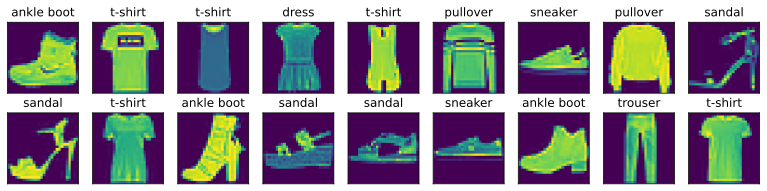

In [37]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

### 3.5.2. 读取小批量

#### 使读取训练集和测试集时更容易，我们用框架自带的数据迭代器
#### 在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。 
#### 通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [38]:
batch_size = 256

def get_dataloader_workers(): #@save
    """用四个进程来读取"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [39]:
timer = fc.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'3.00 sec'

### 3.5.3. 整合所有组件

#### 定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集

In [40]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize)) # 图像大小调整
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [41]:
train_iter, test_iter = load_data_fashion_mnist(32, 64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


### 3.5.4. 小结

#### Fashion-MNIST是一个服装分类数据集，由10个类别的图像组成
#### 数据迭代器是获得更高性能的关键组件

### 3.5.5. 练习

#### 减少batch_size（如减少到1）是否会影响读取性能？
#### A: 不会啊，只是说一次读的数量少了

#### 数据迭代器的性能非常重要。当前的实现足够快吗？探索各种选择来改进它。
#### A: 我认为还可以，可以通过改变num_workers来加速

#### 查阅框架的在线API文档。还有哪些其他数据集可用？
#### A: FGVCAircraftFGVC飞机数据集，Flowers102(Oxford102花卉数据集)，ImageNet(ImageNet 2012 Classification Dataset.)，MovingMNIST，StanfordCars等

### 3.6. softmax回归的从零开始实现

#### softmax回归也是重要的基础，因此应该知道实现softmax回归的细节

In [42]:
from IPython import display

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

### 3.6.1. 初始化模型参数

#### 这里的每个样本都将用固定长度的向量表示
#### 原始数据集中每个样本都是$28 \times 28$的图像，现在将其展平成784的向量（暂时只考虑一个像素一特征）
#### 在softmax回归中，我们的输出与类别一样多，因为我们数据集有10个类别，所以网络输出维度为10
#### 因此，权重将构成一个$784 \times 10$的矩阵，偏置将构成一个$1 \times 10$的向量
#### 用正态分布初始化权重W，用0初始化偏置

In [43]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

### 3.6.2. 定义softmax操作

#### sum运算符可以保持在原始维度，就会自动补上，如(2,3)的向量求sum，keepdim的结果是(1,3)，没有的结果是(3,)，**答案是一样但是维度不一样**

In [44]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(dim=0, keepdim=True), X.sum(dim=1, keepdim=True), X.sum(dim=0, keepdim=False)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]),
 tensor([5., 7., 9.]))

#### 实现softmax由三个步骤组成：

##### 1. 对每个项求幂（使用exp）；

##### 2. 对每一行求和（小批量中每个样本是一行），得到每个样本的规范化常数；

##### 3. 将每一行除以其规范化常数，确保结果的和为1。

#### $$ \mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}. $$

#### 分母或规范化常数，有时也称为配分函数（其对数称为对数-配分函数）
##### ps:该名称来自统计物理学中一个模拟粒子群分布的方程。

In [45]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition # 这里用了广播机制📢 因为维度不一样 sum过被压扁了

#### 对于任何随机输入，我们将每个元素变成一个非负数。 此外，依据概率原理，每行总和为1

In [46]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1) # 按列求和

(tensor([[0.2571, 0.3958, 0.1621, 0.0987, 0.0863],
         [0.1231, 0.1237, 0.0453, 0.3785, 0.3294]]),
 tensor([1.0000, 1.0000]))

#### 这样有点草率，矩阵过大或过小可能造成数值上下溢

### 3.6.3. 定义模型

#### 定义softmax操作后，我们可以实现softmax回归模型

In [64]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

### 3.6.4. 定义损失函数

##### 交叉熵损失函数是目前最火的损失函数之一，因为深学领域分类问题比回归问题多得多
#### 交叉熵采用真实标签的预测概率的负对数似然
#### 俺们不使用Python的for循环迭代预测（太低效了），而是用一个运算符选择所有元素
##### 数据样本y_hat，包含2个样本在3个类别的预测概率以及它们对应的标签y
##### 使用y作为y_hat中概率的索引

In [48]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [49]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y]) # log内部分等价于y_hat[[0, len(y_hat)], y]

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

### 3.6.5. 分类精度

#### 给定预测分布，当我们必须要输出硬预测（hard prediction）时，我们通常选择预测概率最高的一类
#### 当预测与标签分类y一致时，即是正确的。 分类精度即正确预测数量与总预测数量之比
#### 虽然直接优化精度很难（因为精度计算不可导），但精度仍是我们在最关心的性能衡量指标

#### 我们使用argmax去获取每行的最大元素的索引来获取预测类别，然后我么将预测类别与y进行比较
#### 需要将y_hat的类型转换成和y一样的再进行等价比较，结果是一个包含0和1的张量，最后求和预测正确的数量

In [50]:
def accuracy(y_hat, y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y # 用到了强制转换
    return float(cmp.type(y.dtype).sum())

#### 第一个样本的预测类别是2（该行的最大元素为0.6，索引为2），这与实际标签0不一致。 第二个样本的预测类别是2（该行的最大元素为0.5，索引为2），这与实际标签2一致

In [51]:
accuracy(y_hat, y) / len(y)

0.5

#### 同样，对于任意数据迭代器data_iter可访问的数据集， 我们可以评估在任意模型net的精度

#### 这里定义一个实用程序类Accumulator，用于对多个变量进行累
#### 在Accumulator实例中创建了2个变量， 分别用于存储正确预测的数量和预测的总数量

In [53]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)] #zip(self.data, args) 会将 self.data 列表和 args 元组中的元素一一对应地组合成元组，并返回一个生成器。 

    def reset(self):
        self.data = [0.0] * len(self.data) # 重置

    def __getitem__(self, idx):
        return self.data[idx] # 获取


In [62]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

#### 由于使用随机权重初始化net，因此模型精度接近于随机猜测

In [65]:
evaluate_accuracy(net, test_iter)

0.1119

### 3.6.6. 训练

#### 首先，我们定义一个函数来训练一个迭代周期
#### updater是更新模型参数的常用函数，它接受批量大小作为参数
#### 可以是sgd也可以是其他优化函数

In [55]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer): # 如果updater和Optimizer都实例化了就
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad() # 清零
            l.mean().backward() # 反播
            updater.step() # 更新
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0]) # 更新
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

#### 训练函数的实现之前，我们定义一个在动画中绘制数据的实用程序类Animator

In [60]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        fc.use_svg_display()
        self.fig, self.axes = fc.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: fc.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend) # 设置坐标轴标签、范围、刻度、图例等
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla() # 清空当前子图，为绘制新数据做准备。
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True) # 清除之前的输出，避免图表重叠

#### 实现一个训练函数， 它会在train_iter访问到的训练数据集上训练一个模型net
#### 在每个迭代周期结束时，利用test_iter访问到的测试数据集对模型进行评估
#### 用Animator类来可视化训练进度

In [57]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

#### 使用 3.2节中定义的小批量随机梯度下降来优化模型的损失函数，设置学习率为0.1

In [58]:
lr = 0.1

def updater(batch_size):
    return fc.sgd([W, b], lr, batch_size)

#### 现在，我们训练模型10个迭代周期
#### 迭代周期（num_epochs）和学习率（lr）都是可调节的超参数

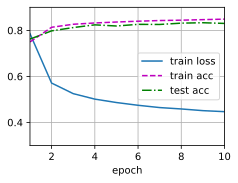

In [66]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

### 3.6.7. 预测

#### 给定一系列图像，我们将比较它们的实际标签（文本输出的第一行）和模型预测（文本输出的第二行）

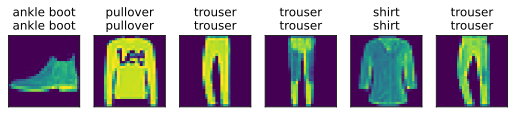

In [67]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = fc.get_fashion_mnist_labels(y)
    preds = fc.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    fc.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

### 3.6.8. 小结

#### 训练softmax回归循环模型与训练线性回归模型非常相似：先读取数据，再定义模型和损失函数，然后使用优化算法训练模型。大多数常见的深度学习模型都有类似的训练过程。

### 3.6.9. 练习

##### 1. 本节直接实现了基于数学定义softmax运算的`softmax`函数。这可能会导致什么问题？提示：尝试计算exp⁡(50)的大小。
##### 2. 本节中的函数`cross_entropy`是根据交叉熵损失函数的定义实现的。它可能有什么问题？提示：考虑对数的定义域。
##### 3. 请想一个解决方案来解决上述两个问题。
##### 4. 返回概率最大的分类标签总是最优解吗？例如，医疗诊断场景下可以这样做吗？
##### 5. 假设我们使用softmax回归来预测下一个单词，可选取的单词数目过多可能会带来哪些问题?

## 3.7. softmax回归的简洁实现

#### 通过深度学习框架的高级API也能更方便地实现softmax回归模型

In [68]:
from torch import nn

batch_size = 256
train_iter, test_iter = fc.load_data_fashion_mnist(batch_size)

### 3.7.1. 初始化模型参数

#### softmax回归的输出层是一个全连接层。 因此，为了实现我们的模型， 我们只需在Sequential中添加一个带有10个输出的全连接层
#### 在这里Sequential并不是必要的， 但它是实现深度模型的基础

In [69]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

### 3.7.2. 重新审视Softmax的实现

#### 在计算交叉熵损失时，如果直接使用模型的输出，可能会出现数值稳定性问题，例如上溢、下溢和 NaN 值。
#### 一种解决方案是先从模型输出中减去最大值，然后计算 softmax 和交叉熵损失。

In [ ]:
loss = nn.CrossEntropyLoss(reduction='none')

### 3.7.3. 优化算法

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

### 3.7.4. 训练

In [ ]:
num_epochs = 10
fc.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 3.7.5. 小结

#### 从计算的角度来看，实现softmax回归比较复杂
#### 深度学习框架在这些著名的技巧之外采取了额外的预防措施，来确保数值的稳定性

### 3.7.6 练习


1. 尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。
2. 增加迭代周期的数量。为什么测试精度会在一段时间后降低？我们怎么解决这个问题？